**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


Author: Yunhe Cui  
Following the instructions given by Dr. Bianco

In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

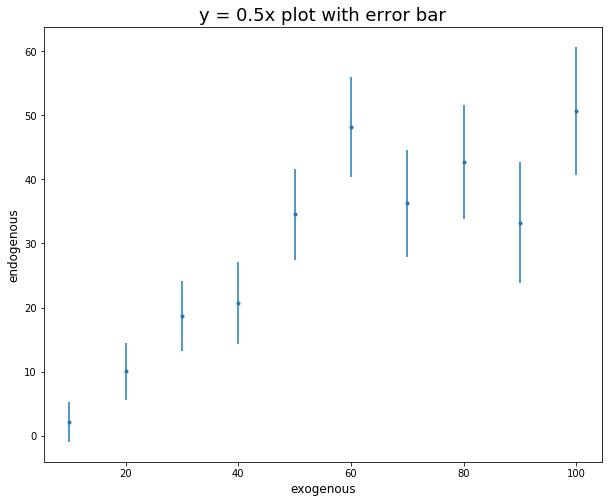

In [3]:
plt.figure(figsize=(10, 8)) 
np.random.seed(2018)
slope = 0.5
intercept = 0
x = np.linspace(10,100,10)
#errors = errors(x)
y = line(slope, x, b = intercept, errors = errors)


plt.errorbar(x, y, errors(x), fmt='.')
plt.title("y = 0.5x plot with error bar", fontsize=18)
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.show()

Figure1. This is a plot for y = 0.5x, with error bar which stand for uncertainties. 

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [5]:
print(y)

[  2.16370112  10.03058341  18.65537569  20.70466777  34.53175019
  48.17165699  36.27943911  42.71460391  33.23725061  50.71882076]


In [6]:
x_e = sm.add_constant(x)
print(x_e)

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.82e-07
Time:                        23:05:48   Log-Likelihood:                -34.361
No. Observations:                  10   AIC:                             70.72
Df Residuals:                       9   BIC:                             71.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5259      0.040     13.023      0.000         0.435     0.617
==============================================================================
Omnibus:                        2.466   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                0.293
Skew:                           0.239   Prob(JB):                        0.864
Kurtosis:                       3.690   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit_r = smf.OLS(y, x_e).fit()
smfit_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     27.55
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000775
Time:                        23:05:48   Log-Likelihood:                -34.092
No. Observations:                  10   AIC:                             72.18
Df Residuals:                       8   BIC:                             72.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.7173      5.589      0.665      0.525        -9.170    16.605
x1             0.4728      0.090      5.249      0.001         0.265     0.680
==============================================================================
Omnibus:                        2.658   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                0.551
Skew:                           0.520   Prob(JB):                        0.759
Kurtosis:                       3.493   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

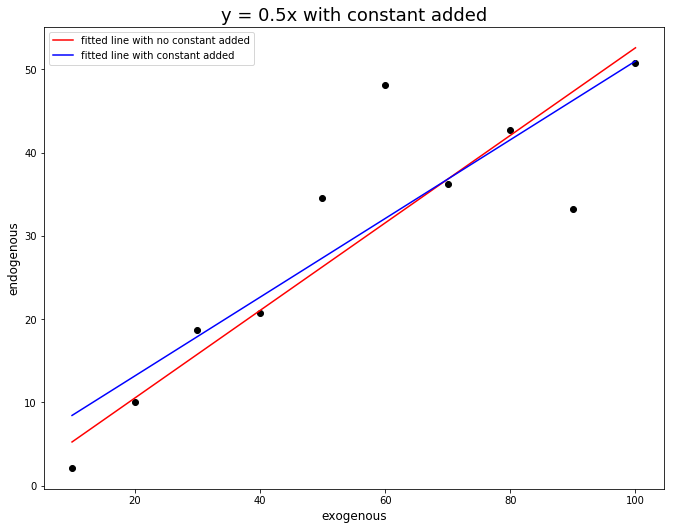

In [9]:
#plot both statsmodels fits

plt.figure(figsize=(10, 8)) 
plt.scatter(x, y, color='k', marker="o")
plt.plot(x, smfit_w.predict(x), color='r',label = 'fitted line with no constant added')
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.title('y = 0.5x with no constant added', fontsize=18)
plt.legend()
plt.tight_layout(3)



plt.plot(x, smfit_r.predict(sm.add_constant(x)), color='b',label = 'fitted line with constant added')
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)
plt.title('y = 0.5x with constant added', fontsize=18)
plt.legend()


plt.show()

Figure 2. Here are two subplot that shows two stat models: one with constant and one without.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

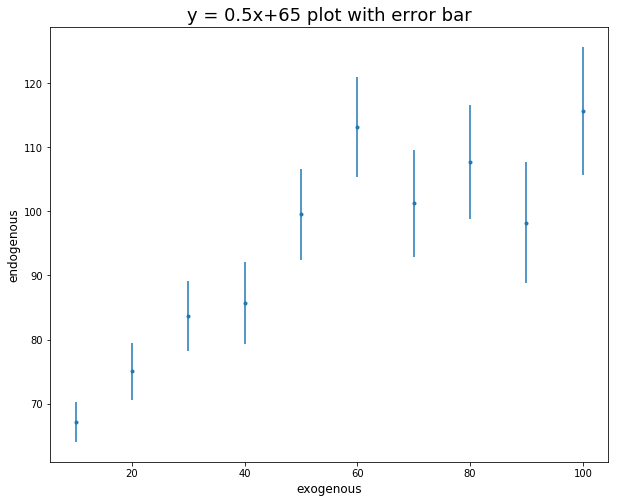

In [10]:
np.random.seed(2018)
slope = 0.5
intercept = 65
x = np.linspace(10,100,10)
#errors = errors(x)
y = line(slope, x, b = intercept, errors = errors)

plt.figure(figsize=(10, 8))
plt.errorbar(x, y, errors(x), fmt='.')
plt.title("y = 0.5x+65 plot with error bar", fontsize=18)
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

plt.show()

Figure 3. This is a plot for y = 0.5x + 65, with error bar which stands for uncertainties. 

# 6. repeat step 3

In [11]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     68.80
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.66e-05
Time:                        23:05:49   Log-Likelihood:                -49.045
No. Observations:                  10   AIC:                             100.1
Df Residuals:                       9   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4545      0.175      8.295      0.000         1.058     1.851
==============================================================================
Omnibus:                        1.542   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                0.921
Skew:                          -0.422   Prob(JB):                        0.631
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#THE RIGHT WAY
smfit_r = smf.OLS(y, x_e).fit()
smfit_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     27.55
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000775
Time:                        23:05:49   Log-Likelihood:                -34.092
No. Observations:                  10   AIC:                             72.18
Df Residuals:                       8   BIC:                             72.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         68.7173      5.589     12.296      0.000        55.830    81.605
x1             0.4728      0.090      5.249      0.001         0.265     0.680
==============================================================================
Omnibus:                        2.658   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                0.551
Skew:                           0.520   Prob(JB):                        0.759
Kurtosis:                       3.493   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
wls_r = sm.WLS(y,x,weights = 1/errors(y)).fit()
wls_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            WLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     62.64
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.41e-05
Time:                        23:05:49   Log-Likelihood:                -49.341
No. Observations:                  10   AIC:                             100.7
Df Residuals:                       9   BIC:                             101.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4698      0.186      7.915      0.000         1.050     1.890
==============================================================================
Omnibus:                        1.289   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.791
Skew:                          -0.319   Prob(JB):                        0.673
Kurtosis:                       1.779   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [14]:
wls_r = sm.WLS(y,x_e,weights = 1/errors(y)).fit()
wls_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            WLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     30.41
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           0.000564
Time:                        23:05:49   Log-Likelihood:                -33.876
No. Observations:                  10   AIC:                             71.75
Df Residuals:                       8   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         68.0394      5.244     12.974      0.000        55.946    80.132
x1             0.4801      0.087      5.515      0.001         0.279     0.681
==============================================================================
Omnibus:                        2.184   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                0.376
Skew:                           0.430   Prob(JB):                        0.829
Kurtosis:                       3.402   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

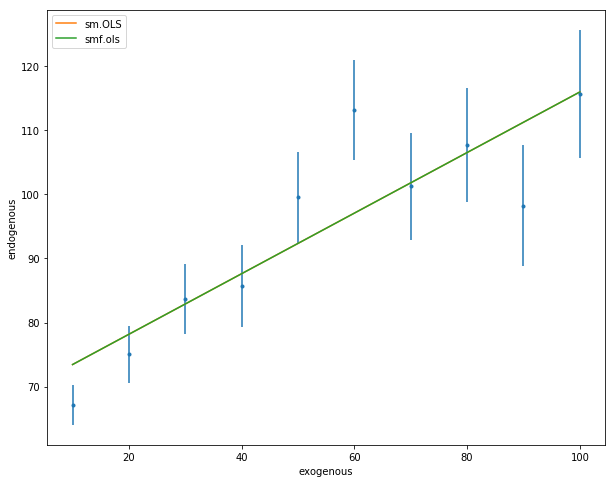

In [15]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
smfitDoneRight = sm.OLS(y, x_e).fit()
plt.figure(figsize=(10, 8))
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")

pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend(loc = 'upper left')
pl.show()